# notebook for data grouping 

### Biopython

In [1]:
from Bio import SeqIO, AlignIO
from pandas import Series, DataFrame
from Bio.SeqUtils import GC

In [2]:
import pandas as pd
import pylab
import matplotlib.pyplot as plt
import numpy as np

#### working directory

In [3]:
pwd

'/Users/migueldelrio/Desktop/panopea/jupyter'

#### directory of files 

In [4]:
ls ../panopea_data/data-results/

Geoduck-transcriptome-v2-1-GO-Slim.xlsx*
Geoduck-transcriptome-v2-GO-Slim.csv
Geoduck-transcriptome-v2-GO-Slim.xlsx*
Geoduck-transcriptome-v2-GO-SlimAnalisis.xlsx*
Geoduck-transcriptome-v2-GO-SlimReproduction.xlsx*
Geoduck-transcriptome-v2-GO-SlimUnique.csv
Geoduck-transcriptome-v2-GO-SlimUnique.xlsx*
Geoduck-transcriptome-v2-GO-SlimUnique2.csv
Geoduck-transcriptome-v2-GO-Slim_2.xlsx*
Geoduck-transcriptome-v2.fasta*
Geoduck-transcriptome-v2.transdecoder.bed
Geoduck-transcriptome-v2.transdecoder.cds
Geoduck-transcriptome-v2.transdecoder.gff3
Geoduck-transcriptome-v2.transdecoder.pep*
Geoduck-transcriptome-v2length.out
Geoduck-transcriptome-v3-GO-contigs.xlsx*
Geoduck-transcriptome-v3-GO-contigsResplado.xlsx*
Geoduck-transcriptome-v3-names.out
Geoduck-transcriptome-v3.fa
Geoduck-transcriptome-v3.out
Geoduck-transcriptome-v3.tab*
Geoduck-transcriptome-v3Description.csv
Geoduck-transcriptome-v3Description.xlsx
Geoduck-transcriptome-v3_blastxnr.xlsx*
Geoduck-transcriptome-v3a.out*
Geoduck-t

### checking fasta file
It shold give these results

| |1|
|-----|------|
|count	|153982.000000|
|mean	|660.440233|
|std	|765.421464|
|min	|201.000000|
|25%	|253.000000|
|50%	|372.000000|
|75%	|734.000000|
|max	|18024.000000|

In [4]:
f = open('../panopea_data/data-results/Geoduck-transcriptome-v3.fa', 'r')
sizes = [(rec.name, len(rec)) for rec in SeqIO.parse(f, "fasta")]
#f.close()
sizesdataf= DataFrame(sizes) #, "contigs", "length")
sizesdataf.describe()


1
count  153982.000000
mean      660.440233
std       765.421464
min       201.000000
25%       253.000000
50%       372.000000
75%       734.000000
max     18024.000000

### CpG calculation

In [5]:
#para el calculo de CpG
def CpG(se):
    g= se.seq.count("G")
    c= se.seq.count("C")
    cg= se.seq.count("CG")
    lar= len(se.seq)
    cpG=0
    try:
        g*c==0
    except:
        #print (sec.id)
        #record_id.append(sec.id)
        #record_cpg.append(0.0000)
        cpG=0
    else:
        #print (sec.id, round(cg/(g*c)*(lar**2/(lar-1)) ,8))
        #record_id.append(record.id)
        #record_cpg.append(round(cg/(g*c)*(lar**2/(lar-1)) ,8)) 
        cpG=(round(cg/(g*c)*(lar**2/(lar-1)) ,8))
    return(cpG)

In [6]:
f= open('../panopea_data/data-results/Geoduck-transcriptome-v3.fa', 'r')
out_file =[]
#out_file.append('contig,length')
linea=""
n=0
for sec in SeqIO.parse(f, 'fasta'):
    #cpg = CpG(sec.seq)

    g= sec.seq.count("G")
    c= sec.seq.count("C")
    cg= sec.seq.count("CG")
    lar= len(sec.seq)
    cpG=0
    try:
        g*c==0
    except:
        cpG=0
    else:
        cpG=(round(cg/(g*c)*(lar**2/(lar-1)) ,8))
    linea= (sec.id,len(sec.seq),round(GC(sec.seq),4),cpG)
    #print (linea)
    out_file.append(linea)
    #if n==10:
    #    #break
    #n+=1

out_file = DataFrame(out_file)
out_file = out_file.rename(columns={0: 'ContigID', 1: 'length', 2:"GC content", 3: "CpG"})
out_file.describe()

length     GC content            CpG
count  153982.000000  153982.000000  153982.000000
mean      660.440233      36.034563       0.547723
std       765.421464       6.727696       0.323846
min       201.000000      13.043500       0.000000
25%       253.000000      31.065650       0.323447
50%       372.000000      34.905700       0.492127
75%       734.000000      40.390000       0.727148
max     18024.000000      84.386600       3.514344

|	|length|GC content	|CpG|
|---|------|--|---------|---|
|count	|153982.000000	|153982.000000	|153982.000000|
|mean	|660.440233	|36.034563	|0.547723|
|std	|765.421464	|6.727696	|0.323846|
|min	|201.000000	|13.043500	|0.000000|
|25%	|253.000000	|31.065650	|0.323447|
|50%	|372.000000	|34.905700	|0.492127|
|75%	|734.000000	|40.390000	|0.727148|
|max	|18024.000000	|84.386600	|3.514344|

In [7]:
%matplotlib inline

#### sequences description from notebook
*01-Geoduck-fasta-v3.ipynb*

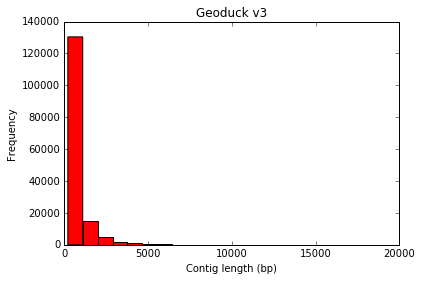

In [9]:
ax= plt.gca()
ax.hist(out_file['length'], bins=20, color = 'r')
ax.set_xlabel('Contig length (bp)')
ax.set_ylabel('Frequency')
ax.set_title (r"Geoduck v3")
#plt.savefig("../img/Geoduck-transcriptome-v3length.png")
plt.show()

### log10 transformation

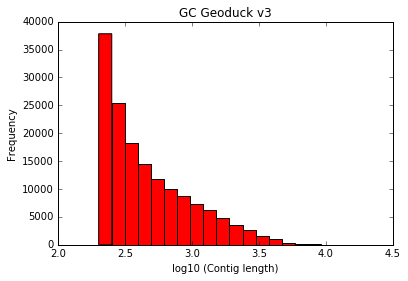

In [10]:
ax= plt.gca()
ax.hist(np.log10(out_file['length']), bins=20, color = 'r')
ax.set_xlabel('log10 (Contig length)')
ax.set_ylabel('Frequency')
ax.set_title (r"GC Geoduck v3")
plt.savefig("../img/Geoduck-transcriptome-v3loglength.png")
plt.show()

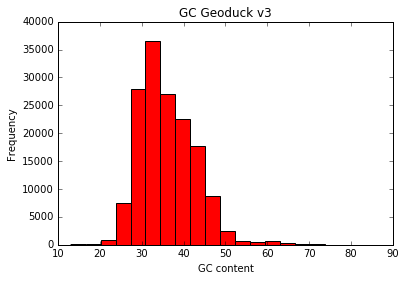

In [11]:
ax= plt.gca()
ax.hist(out_file['GC content'], bins=20, color = 'r')
ax.set_xlabel('GC content')
ax.set_ylabel('Frequency')
ax.set_title (r"GC Geoduck v3")
plt.savefig("../img/Geoduck-transcriptome-v3gc.png")
plt.show()

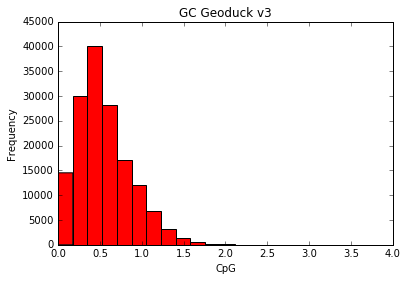

In [12]:
ax= plt.gca()
ax.hist(out_file['CpG'], bins=20, color = 'r')
ax.set_xlabel('CpG')
ax.set_ylabel('Frequency')
ax.set_title (r"GC Geoduck v3")
plt.savefig("../img/Geoduck-transcriptome-v3gc.png")
plt.show()

In [8]:
out_file

ContigID  length  GC content       CpG
0       comp100000_c0_seq1     453     33.9956  0.919033
1       comp100001_c1_seq1     493     30.4260  0.264219
2       comp100001_c2_seq1     558     30.6452  0.233631
3       comp100002_c0_seq1     208     40.8654  0.985872
4       comp100004_c1_seq1     276     31.5217  0.439224
5       comp100007_c0_seq1     734     32.1526  0.689395
6       comp100010_c0_seq1     246     38.2114  1.136696
7       comp100011_c0_seq1     315     33.6508  0.562483
8       comp100012_c0_seq1     218     35.3211  0.152087
9       comp100014_c0_seq1     389     32.9049  0.571851
10      comp100015_c0_seq1     201     28.3582  1.033274
11      comp100025_c0_seq1     201     58.7065  0.993659
12      comp100027_c1_seq1     234     32.0513  0.334764
13      comp100029_c1_seq1     288     50.0000  0.669506
14      comp100031_c0_seq1     307     49.1857  0.333337
15      comp100033_c0_seq1     371     28.8410  0.654473
16      comp100035_c0_seq1     461     35.1410  0.212415
17      comp100036_c0_seq1     207     42.5121  0.113292
18      comp100036_c0_seq2     228     40.7895  0.342479
19      comp100038_c0_seq1     312     28.8462  0.314734
20       comp10003_c0_seq1     249     28.5141  0.595248
21      comp100041_c0_seq1     321     31.7757  0.248459
22      comp100041_c1_seq1     290     38.2759  0.673619
23      comp100041_c1_seq2     213     35.6808  0.444916
24      comp100043_c0_seq1     207     36.2319  0.447643
25      comp100045_c0_seq1     243     27.5720  0.879294
26      comp100046_c1_seq1     225     24.8889  0.294277
27      comp100047_c0_seq1     425     40.4706  0.403411
28      comp100047_c0_seq2     516     38.5659  0.839119
29      comp100052_c0_seq1     277     35.0181  0.827392
...                    ...     ...         ...       ...
153952   comp99952_c0_seq2     249     44.9799  0.320518
153953   comp99956_c0_seq1     221     30.7692  1.168445
153954   comp99957_c0_seq1     414     38.6473  0.470448
153955   comp99964_c0_seq1     339     37.4631  0.592045
153956   comp99965_c0_seq1     225     28.4444  0.000000
153957   comp99966_c0_seq1     383     28.1984  0.263738
153958   comp99967_c0_seq1     222     28.8288  0.871111
153959   comp99970_c0_seq1     474     29.9578  0.378111
153960   comp99971_c0_seq1     265     30.9434  0.449331
153961   comp99972_c0_seq1     484     44.2149  0.171606
153962   comp99972_c0_seq2     717     40.7252  0.204880
153963   comp99973_c0_seq1     280     60.7143  1.246136
153964   comp99974_c0_seq1     226     29.2035  0.450406
153965   comp99979_c0_seq1     219     32.8767  0.865478
153966   comp99980_c0_seq1     425     66.1176  1.058525
153967   comp99980_c0_seq2     329     63.8298  0.977787
153968   comp99982_c0_seq1     328     37.8049  0.702998
153969   comp99983_c0_seq1     330     40.6061  0.371663
153970   comp99983_c1_seq1     595     42.0168  0.573483
153971   comp99984_c0_seq1     474     29.1139  0.112241
153972   comp99985_c0_seq1     587     34.2419  0.652150
153973   comp99986_c0_seq1     247     42.5101  0.646806
153974   comp99986_c2_seq1     261     42.5287  0.433207
153975   comp99988_c0_seq1     487     36.1396  0.700512
153976   comp99988_c0_seq2     716     35.1955  0.813388
153977   comp99991_c0_seq1     332     35.5422  0.489710
153978   comp99995_c0_seq1     204     34.3137  0.167899
153979   comp99996_c0_seq1     242     57.8512  1.306474
153980   comp99996_c2_seq1     212     63.6792  1.171901
153981   comp99998_c0_seq1     285     31.2281  0.583681

[153982 rows x 4 columns]

## adding annotation from file
### Geoduck-tranv3-blastx_sprot.sorted
#### this file was obtained from notebook *01.2-Geo-Trans-annotation.ipynb*

In [9]:
ls ../panopea_data/data-results/Geoduck-tranv3*


../panopea_data/data-results/Geoduck-tranv3-blastx_sprot.sorted.txt*
../panopea_data/data-results/Geoduck-tranv3-blastx_sprot_sorted.csv


In [10]:
f_annotation = pd.read_csv ("../panopea_data/data-results/Geoduck_v3_uniprot_wGO.csv", index_col=None)
f_annotation

ContigID         evalue UniProt_Acc  \
0      comp100065_c0_seq1   2.000000e-08      Q5PRC1   
1      comp100097_c0_seq1   2.000000e-37      Q9UI26   
2      comp100104_c2_seq1   3.000000e-29      Q9NZJ4   
3      comp100105_c1_seq1   2.000000e-73      P18756   
4      comp100108_c1_seq1   3.000000e-59      Q9U943   
5      comp100109_c0_seq1   6.000000e-23      O75443   
6      comp100113_c0_seq1   2.000000e-06      Q95US5   
7      comp100113_c0_seq2   9.000000e-13      Q9N295   
8      comp100113_c1_seq1   7.000000e-09      Q9MYM7   
9      comp100129_c0_seq1   9.000000e-30      Q14644   
10     comp100141_c0_seq1   1.000000e-65      O95847   
11     comp100174_c1_seq1   9.000000e-13      Q9UPQ7   
12     comp100184_c0_seq2   3.000000e-24      Q9C509   
13     comp100187_c0_seq1   5.000000e-35      Q16RI1   
14     comp100218_c0_seq1   7.000000e-16      Q9Y5Q9   
15     comp100298_c0_seq1   1.000000e-17      A0R5M8   
16     comp100305_c0_seq1   1.000000e-27      P06280   
17     comp100366_c1_seq1   1.000000e-43      Q852M1   
18     comp100370_c0_seq1   6.000000e-06      Q494W8   
19     comp100387_c1_seq1   6.000000e-06      H2A0N9   
20     comp100414_c0_seq1   2.000000e-19      Q3V080   
21     comp100414_c1_seq1   9.000000e-22      Q9H116   
22     comp100439_c1_seq1   3.000000e-33      P58295   
23     comp100440_c0_seq1   2.000000e-77      Q9JJW0   
24     comp100442_c0_seq1   1.000000e-35      Q02318   
25     comp100466_c0_seq1   7.000000e-09      Q9CRG1   
26     comp100480_c0_seq1   2.000000e-32      Q05688   
27     comp100480_c1_seq1   1.000000e-16      Q91571   
28     comp100502_c1_seq1   4.000000e-14      Q04791   
29     comp100517_c1_seq1   4.000000e-36      Q8IZJ1   
...                   ...            ...         ...   
22944   comp99640_c0_seq2   7.000000e-62      P51955   
22945   comp99658_c0_seq1   5.000000e-24      Q8IZ52   
22946   comp99678_c0_seq1   4.000000e-20      E2QUI9   
22947   comp99698_c0_seq1   4.000000e-23      Q14585   
22948   comp99725_c0_seq1   3.000000e-37      Q5M868   
22949   comp99725_c0_seq2   7.000000e-09      Q7KT91   
22950   comp99731_c0_seq1   2.000000e-25      Q8IWB9   
22951   comp99768_c1_seq1   4.000000e-35      Q62824   
22952   comp99769_c0_seq1   5.000000e-91      Q8X119   
22953   comp99776_c0_seq1  1.000000e-146      P27808   
22954   comp99786_c0_seq1   2.000000e-16      A8WHP3   
22955   comp99794_c0_seq1   3.000000e-09      Q6GNV7   
22956   comp99807_c0_seq1   3.000000e-09      P18722   
22957   comp99829_c0_seq1   6.000000e-33      Q9NQZ5   
22958    comp9984_c0_seq1   4.000000e-51      Q6P423   
22959   comp99849_c0_seq1   2.000000e-24      Q9H3U1   
22960   comp99866_c0_seq1   6.000000e-63      P35241   
22961   comp99880_c0_seq1   3.000000e-49      Q9Y666   
22962   comp99891_c0_seq1   1.000000e-12      Q99M85   
22963   comp99895_c0_seq1   1.000000e-16      Q683D5   
22964   comp99895_c0_seq2   8.000000e-52      Q5FVN8   
22965   comp99916_c0_seq1   9.000000e-22      P51840   
22966   comp99922_c0_seq1   2.000000e-43      Q9BY27   
22967   comp99943_c0_seq1   1.000000e-20      D2GXS7   
22968   comp99943_c1_seq2   7.000000e-40      A4IF63   
22969   comp99950_c0_seq1   5.000000e-27      B2UGE9   
22970   comp99983_c1_seq1   2.000000e-50      Q8K0Q5   
22971   comp99986_c2_seq1   6.000000e-29      Q5ZJL9   
22972   comp99996_c0_seq1   1.000000e-50      Q6A707   
22973   comp99996_c2_seq1   3.000000e-29      B9LDY3   

                                       Gene ontology IDs  \
0                                             GO:0016021   
1         GO:0005737; GO:0005634; GO:0008565; GO:0006610   
2      GO:0005524; GO:0030424; GO:0070852; GO:0008219...   
3      GO:0005634; GO:0010595; GO:0045765; GO:0043565...   
4         GO:0016055; GO:0005576; GO:0008289; GO:0005319   
5      GO:0031225; GO:0007160; GO:0005201; GO:0005886...   
6      GO:0000139; GO:0008376; GO:0016051; GO:0075015...   
7      GO:0000139; GO:0005783; GO:0008378; GO:0016021...   
8   

# merging with annotated values only

In [11]:
f2 = pd.merge(out_file, f_annotation,  how='inner')
f2

ContigID  length  GC content       CpG         evalue  \
0      comp100065_c0_seq1     201     50.2488  0.886765   2.000000e-08   
1      comp100097_c0_seq1     679     43.0044  0.486758   2.000000e-37   
2      comp100104_c2_seq1     422     36.9668  0.563721   3.000000e-29   
3      comp100105_c1_seq1     863     47.0452  0.503791   2.000000e-73   
4      comp100108_c1_seq1    1185     44.0506  0.509202   3.000000e-59   
5      comp100109_c0_seq1     701     39.2297  0.633105   6.000000e-23   
6      comp100113_c0_seq1     381     40.4199  1.162870   2.000000e-06   
7      comp100113_c0_seq2     421     41.0926  0.982745   9.000000e-13   
8      comp100113_c1_seq1     283     36.0424  1.421658   7.000000e-09   
9      comp100129_c0_seq1     351     47.0085  0.366888   9.000000e-30   
10     comp100141_c0_seq1     605     41.6529  0.349169   1.000000e-65   
11     comp100174_c1_seq1     250     48.4000  1.097885   9.000000e-13   
12     comp100184_c0_seq2     458     42.7948  0.636212   3.000000e-24   
13     comp100187_c0_seq1     375     38.9333  0.494276   5.000000e-35   
14     comp100218_c0_seq1     733     43.6562  0.430230   7.000000e-16   
15     comp100298_c0_seq1     670     46.2687  0.888934   1.000000e-17   
16     comp100305_c0_seq1     229     41.4847  0.313642   1.000000e-27   
17     comp100366_c1_seq1     593     46.5430  0.375258   1.000000e-43   
18     comp100370_c0_seq1     830     38.6747  1.065800   6.000000e-06   
19     comp100387_c1_seq1     202     46.5347  1.041051   6.000000e-06   
20     comp100414_c0_seq1     416     35.8173  0.752984   2.000000e-19   
21     comp100414_c1_seq1     343     41.1079  0.553727   9.000000e-22   
22     comp100439_c1_seq1     573     42.2339  0.672041   3.000000e-33   
23     comp100440_c0_seq1     711     39.5218  0.325115   2.000000e-77   
24     comp100442_c0_seq1     986     39.4523  1.252539   1.000000e-35   
25     comp100466_c0_seq1     494     41.9028  0.434636   7.000000e-09   
26     comp100480_c0_seq1     254     43.7008  0.745626   2.000000e-32   
27     comp100480_c1_seq1     306     45.7516  0.447527   1.000000e-16   
28     comp100502_c1_seq1     374     40.1070  0.869145   4.000000e-14   
29     comp100517_c1_seq1    1285     40.8560  0.450149   4.000000e-36   
...                   ...     ...         ...       ...            ...   
22944   comp99640_c0_seq2     391     43.2225  0.671237   7.000000e-62   
22945   comp99658_c0_seq1     493     46.0446  0.383542   5.000000e-24   
22946   comp99678_c0_seq1     482     43.7759  0.535479   4.000000e-20   
22947   comp99698_c0_seq1     333     32.4324  0.811813   4.000000e-23   
22948   comp99725_c0_seq1     569     45.6942  0.508930   3.000000e-37   
22949   comp99725_c0_seq2     422     43.1280  0.567442   7.000000e-09   
22950   comp99731_c0_seq1     787     41.5502  0.413556   2.000000e-25   
22951   comp99768_c1_seq1     459     44.2266  0.319066   4.000000e-35   
22952   comp99769_c0_seq1    1229     37.3474  0.949808   5.000000e-91   
22953   comp99776_c0_seq1    1527     45.2521  0.517484  1.000000e-146   
22954   comp99786_c0_seq1     395     49.8734  0.825693   2.000000e-16   
22955   comp99794_c0_seq1     294     45.9184  0.733508   3.000000e-09   
22956   comp99807_c0_seq1     511     40.5088  0.486232   3.000000e-09   
22957   comp99829_c0_seq1     507     42.2091  0.741271   6.000000e-33   
22958   comp99849_c0_seq1     397     41.8136  0.579841   2.000000e-24   
22959    comp9984_c0_seq1     355     47.0423  0.357535   4.000000e-51   
22960   comp99866_c0_seq1     385     41.8182  0.367738   6.000000e-63   
22961   comp99880_c0_seq1     374     49.4652  0.487247   3.000000e-49   
22962   comp99891_c0_seq1     397     39.5466  0.782186   1.000000e-12   
22963   comp99895_c0_seq1     279     48.0287  0.567575   1.000000e-16   
22964   comp99895_c0_seq2     819     46.1538  0.373832   8.000000e-52   
22965   comp99916_c0_seq1     206     49.0291  0.649427   9.000000e-22   
22966   comp99922_c0_

In [12]:
len(f2)

22974

# merging with all values

In [13]:
f2 = pd.merge(out_file, f_annotation,  how='outer')
f2

ContigID  length  GC content       CpG        evalue  \
0       comp100000_c0_seq1     453     33.9956  0.919033           NaN   
1       comp100001_c1_seq1     493     30.4260  0.264219           NaN   
2       comp100001_c2_seq1     558     30.6452  0.233631           NaN   
3       comp100002_c0_seq1     208     40.8654  0.985872           NaN   
4       comp100004_c1_seq1     276     31.5217  0.439224           NaN   
5       comp100007_c0_seq1     734     32.1526  0.689395           NaN   
6       comp100010_c0_seq1     246     38.2114  1.136696           NaN   
7       comp100011_c0_seq1     315     33.6508  0.562483           NaN   
8       comp100012_c0_seq1     218     35.3211  0.152087           NaN   
9       comp100014_c0_seq1     389     32.9049  0.571851           NaN   
10      comp100015_c0_seq1     201     28.3582  1.033274           NaN   
11      comp100025_c0_seq1     201     58.7065  0.993659           NaN   
12      comp100027_c1_seq1     234     32.0513  0.334764           NaN   
13      comp100029_c1_seq1     288     50.0000  0.669506           NaN   
14      comp100031_c0_seq1     307     49.1857  0.333337           NaN   
15      comp100033_c0_seq1     371     28.8410  0.654473           NaN   
16      comp100035_c0_seq1     461     35.1410  0.212415           NaN   
17      comp100036_c0_seq1     207     42.5121  0.113292           NaN   
18      comp100036_c0_seq2     228     40.7895  0.342479           NaN   
19      comp100038_c0_seq1     312     28.8462  0.314734           NaN   
20       comp10003_c0_seq1     249     28.5141  0.595248           NaN   
21      comp100041_c0_seq1     321     31.7757  0.248459           NaN   
22      comp100041_c1_seq1     290     38.2759  0.673619           NaN   
23      comp100041_c1_seq2     213     35.6808  0.444916           NaN   
24      comp100043_c0_seq1     207     36.2319  0.447643           NaN   
25      comp100045_c0_seq1     243     27.5720  0.879294           NaN   
26      comp100046_c1_seq1     225     24.8889  0.294277           NaN   
27      comp100047_c0_seq1     425     40.4706  0.403411           NaN   
28      comp100047_c0_seq2     516     38.5659  0.839119           NaN   
29      comp100052_c0_seq1     277     35.0181  0.827392           NaN   
...                    ...     ...         ...       ...           ...   
153952   comp99952_c0_seq2     249     44.9799  0.320518           NaN   
153953   comp99956_c0_seq1     221     30.7692  1.168445           NaN   
153954   comp99957_c0_seq1     414     38.6473  0.470448           NaN   
153955   comp99964_c0_seq1     339     37.4631  0.592045           NaN   
153956   comp99965_c0_seq1     225     28.4444  0.000000           NaN   
153957   comp99966_c0_seq1     383     28.1984  0.263738           NaN   
153958   comp99967_c0_seq1     222     28.8288  0.871111           NaN   
153959   comp99970_c0_seq1     474     29.9578  0.378111           NaN   
153960   comp99971_c0_seq1     265     30.9434  0.449331           NaN   
153961   comp99972_c0_seq1     484     44.2149  0.171606           NaN   
153962   comp99972_c0_seq2     717     40.7252  0.204880           NaN   
153963   comp99973_c0_seq1     280     60.7143  1.246136           NaN   
153964   comp99974_c0_seq1     226     29.2035  0.450406           NaN   
153965   comp99979_c0_seq1     219     32.8767  0.865478           NaN   
153966   comp99980_c0_seq1     425     66.1176  1.058525           NaN   
153967   comp99980_c0_seq2     329     63.8298  0.977787           NaN   
153968   comp99982_c0_seq1     328     37.8049  0.702998           NaN   
153969   comp99983_c0_seq1     330     40.6061  0.371663           NaN   
153970   comp99983_c1_seq1     595     42.0168  0.573483  2.000000e-50   
153971   comp99984_c0_seq1     474     29.1139  0.112241           NaN   
153972   comp99985_c0_seq1     587     34.2419  0.652150           NaN   
153973   comp99986_c0_seq1     247     42.5101  0.646806           NaN   
153974   comp99986_c2_

In [14]:
len(f2)

153982

In [15]:
f_exp = pd.read_csv ("../panopea_data/data-results/Male-v-Female-Expression.csv", index_col=None)
f_exp

FeatureID     range  difference   fold_change  male_unique  \
0       comp144588_c2_seq1  20506477   -20506477     -3.426534     28957409   
1       comp144588_c3_seq1  19963924   -19963924     -3.796427     27102977   
2       comp144588_c4_seq1  15492666   -15492666     -3.083767     22927597   
3       comp144588_c1_seq1    822446     -822446     -3.120936      1210217   
4       comp128741_c0_seq1    338448     -338448    -25.461405       352284   
5       comp123774_c0_seq1    277289     -277289    -16.474580       295208   
6       comp116632_c1_seq1    223849     -223849    -43.581130       229106   
7       comp138387_c0_seq1    198883     -198883     -3.196364        42277   
8       comp138387_c0_seq6    152574     -152574     -6.177265       124134   
9       comp116632_c0_seq1    115753     -115753    -66.881047       117510   
10       comp90305_c0_seq1     87030      -87030    -38.561502        89347   
11      comp109505_c0_seq1     79451      -79451    -66.716294        80660   
12       comp90340_c1_seq1     67692      -67692    -41.437276        69366   
13      comp129258_c0_seq1     55566      -55566    -33.724382        57264   
14      comp140465_c0_seq1     48206      -48206    -31.782886        49772   
15       comp90340_c0_seq1     47659      -47659    -82.607877        48243   
16      comp140139_c0_seq1     46164      -46164    -47.395980        22542   
17      comp122378_c0_seq1     42649      -42649   -168.250980        42904   
18      comp138471_c0_seq1     41182      -41182  -1648.280000        41207   
19      comp116638_c0_seq1     38092      -38092     -1.739938        89572   
20      comp141511_c0_seq1     36839      -36839    -11.201883        40450   
21      comp134005_c0_seq8     33693      -33693 -16847.500000         4338   
22      comp143248_c0_seq1     30518      -30518    -35.997706        20048   
23      comp143345_c0_seq3     27916      -27916    -26.470803        28825   
24      comp141740_c0_seq1     24642      -24642    -13.656394        26589   
25      comp131685_c0_seq1     23690      -23690  -1129.095238        23711   
26      comp123582_c0_seq1     22316      -22316     -6.317131         2484   
27      comp129286_c0_seq2     21706      -21706    -15.656313        16378   
28       comp90340_c2_seq1     20829      -20829    -57.754768        21196   
29      comp144434_c0_seq1     20149      -20149  -1186.235294          737   
...                    ...       ...         ...           ...          ...   
154377  comp138414_c0_seq1    197140      197140      3.202928        89490   
154378  comp144358_c0_seq1    199605      199605     18.076311        11686   
154379   comp90451_c0_seq1    199903      199903      2.399381       142851   
154380  comp123805_c0_seq1    203988      203988      3.517034        81043   
154381  comp140595_c0_seq2    207177      207177   3093.194030           29   
154382  comp141331_c1_seq2    208433      208433   1709.467213           59   
154383  comp132075_c0_seq2    208853      208853      4.255292        58726   
154384  comp109565_c0_seq1    210316      210316      5.207414        49987   
154385   comp28270_c0_seq1    213764      213764      4.482009        61391   
154386  comp130910_c0_seq1    214963      214963      3.156271        99692   
154387  comp134923_c0_seq4    217866      217866   1513.958333          111   
154388  comp144588_c0_seq1    226090      226090      2.575573       143497   
154389  comp144619_c0_seq1    230238      230238      4.366151        68398   
154390  comp134923_c0_seq3    234926      234926   5730.902439           25   
154391  comp135102_c0_seq1    246648      246648   1562.063291          158   
154392  comp141331_c1_seq5    260250      260250   1957.766917           77   
154393  comp141331_c1_seq6    276324      276324   2940.617021           54   
154394  comp123770_c0_seq1    301541      301541      5.249750        70955   
154395  comp116618_c0_seq1    303349      303349      5.727713     

In [16]:
len(f_exp)

154407

### the file Male-v-Female-Expression.csv
seems to have the data from all contigs including the non-eukaryote

In [17]:
f_exp = f_exp.rename(columns={"FeatureID" : 'ContigID'})
f_exp

ContigID     range  difference   fold_change  male_unique  \
0       comp144588_c2_seq1  20506477   -20506477     -3.426534     28957409   
1       comp144588_c3_seq1  19963924   -19963924     -3.796427     27102977   
2       comp144588_c4_seq1  15492666   -15492666     -3.083767     22927597   
3       comp144588_c1_seq1    822446     -822446     -3.120936      1210217   
4       comp128741_c0_seq1    338448     -338448    -25.461405       352284   
5       comp123774_c0_seq1    277289     -277289    -16.474580       295208   
6       comp116632_c1_seq1    223849     -223849    -43.581130       229106   
7       comp138387_c0_seq1    198883     -198883     -3.196364        42277   
8       comp138387_c0_seq6    152574     -152574     -6.177265       124134   
9       comp116632_c0_seq1    115753     -115753    -66.881047       117510   
10       comp90305_c0_seq1     87030      -87030    -38.561502        89347   
11      comp109505_c0_seq1     79451      -79451    -66.716294        80660   
12       comp90340_c1_seq1     67692      -67692    -41.437276        69366   
13      comp129258_c0_seq1     55566      -55566    -33.724382        57264   
14      comp140465_c0_seq1     48206      -48206    -31.782886        49772   
15       comp90340_c0_seq1     47659      -47659    -82.607877        48243   
16      comp140139_c0_seq1     46164      -46164    -47.395980        22542   
17      comp122378_c0_seq1     42649      -42649   -168.250980        42904   
18      comp138471_c0_seq1     41182      -41182  -1648.280000        41207   
19      comp116638_c0_seq1     38092      -38092     -1.739938        89572   
20      comp141511_c0_seq1     36839      -36839    -11.201883        40450   
21      comp134005_c0_seq8     33693      -33693 -16847.500000         4338   
22      comp143248_c0_seq1     30518      -30518    -35.997706        20048   
23      comp143345_c0_seq3     27916      -27916    -26.470803        28825   
24      comp141740_c0_seq1     24642      -24642    -13.656394        26589   
25      comp131685_c0_seq1     23690      -23690  -1129.095238        23711   
26      comp123582_c0_seq1     22316      -22316     -6.317131         2484   
27      comp129286_c0_seq2     21706      -21706    -15.656313        16378   
28       comp90340_c2_seq1     20829      -20829    -57.754768        21196   
29      comp144434_c0_seq1     20149      -20149  -1186.235294          737   
...                    ...       ...         ...           ...          ...   
154377  comp138414_c0_seq1    197140      197140      3.202928        89490   
154378  comp144358_c0_seq1    199605      199605     18.076311        11686   
154379   comp90451_c0_seq1    199903      199903      2.399381       142851   
154380  comp123805_c0_seq1    203988      203988      3.517034        81043   
154381  comp140595_c0_seq2    207177      207177   3093.194030           29   
154382  comp141331_c1_seq2    208433      208433   1709.467213           59   
154383  comp132075_c0_seq2    208853      208853      4.255292        58726   
154384  comp109565_c0_seq1    210316      210316      5.207414        49987   
154385   comp28270_c0_seq1    213764      213764      4.482009        61391   
154386  comp130910_c0_seq1    214963      214963      3.156271        99692   
154387  comp134923_c0_seq4    217866      217866   1513.958333          111   
154388  comp144588_c0_seq1    226090      226090      2.575573       143497   
154389  comp144619_c0_seq1    230238      230238      4.366151        68398   
154390  comp134923_c0_seq3    234926      234926   5730.902439           25   
154391  comp135102_c0_seq1    246648      246648   1562.063291          158   
154392  comp141331_c1_seq5    260250      260250   1957.766917           77   
154393  comp141331_c1_seq6    276324      276324   2940.617021           54   
154394  comp123770_c0_seq1    301541      301541      5.249750        70955   
154395  comp116618_c0_seq1    303349      303349      5.727713      

In [18]:
f3 = pd.merge(f2, f_exp, how='inner')
f3

ContigID  length  GC content       CpG        evalue  \
0       comp100000_c0_seq1     453     33.9956  0.919033           NaN   
1       comp100001_c1_seq1     493     30.4260  0.264219           NaN   
2       comp100001_c2_seq1     558     30.6452  0.233631           NaN   
3       comp100002_c0_seq1     208     40.8654  0.985872           NaN   
4       comp100004_c1_seq1     276     31.5217  0.439224           NaN   
5       comp100007_c0_seq1     734     32.1526  0.689395           NaN   
6       comp100010_c0_seq1     246     38.2114  1.136696           NaN   
7       comp100011_c0_seq1     315     33.6508  0.562483           NaN   
8       comp100012_c0_seq1     218     35.3211  0.152087           NaN   
9       comp100014_c0_seq1     389     32.9049  0.571851           NaN   
10      comp100015_c0_seq1     201     28.3582  1.033274           NaN   
11      comp100025_c0_seq1     201     58.7065  0.993659           NaN   
12      comp100027_c1_seq1     234     32.0513  0.334764           NaN   
13      comp100029_c1_seq1     288     50.0000  0.669506           NaN   
14      comp100031_c0_seq1     307     49.1857  0.333337           NaN   
15      comp100033_c0_seq1     371     28.8410  0.654473           NaN   
16      comp100035_c0_seq1     461     35.1410  0.212415           NaN   
17      comp100036_c0_seq1     207     42.5121  0.113292           NaN   
18      comp100036_c0_seq2     228     40.7895  0.342479           NaN   
19      comp100038_c0_seq1     312     28.8462  0.314734           NaN   
20       comp10003_c0_seq1     249     28.5141  0.595248           NaN   
21      comp100041_c0_seq1     321     31.7757  0.248459           NaN   
22      comp100041_c1_seq1     290     38.2759  0.673619           NaN   
23      comp100041_c1_seq2     213     35.6808  0.444916           NaN   
24      comp100043_c0_seq1     207     36.2319  0.447643           NaN   
25      comp100045_c0_seq1     243     27.5720  0.879294           NaN   
26      comp100046_c1_seq1     225     24.8889  0.294277           NaN   
27      comp100047_c0_seq1     425     40.4706  0.403411           NaN   
28      comp100047_c0_seq2     516     38.5659  0.839119           NaN   
29      comp100052_c0_seq1     277     35.0181  0.827392           NaN   
...                    ...     ...         ...       ...           ...   
153952   comp99952_c0_seq2     249     44.9799  0.320518           NaN   
153953   comp99956_c0_seq1     221     30.7692  1.168445           NaN   
153954   comp99957_c0_seq1     414     38.6473  0.470448           NaN   
153955   comp99964_c0_seq1     339     37.4631  0.592045           NaN   
153956   comp99965_c0_seq1     225     28.4444  0.000000           NaN   
153957   comp99966_c0_seq1     383     28.1984  0.263738           NaN   
153958   comp99967_c0_seq1     222     28.8288  0.871111           NaN   
153959   comp99970_c0_seq1     474     29.9578  0.378111           NaN   
153960   comp99971_c0_seq1     265     30.9434  0.449331           NaN   
153961   comp99972_c0_seq1     484     44.2149  0.171606           NaN   
153962   comp99972_c0_seq2     717     40.7252  0.204880           NaN   
153963   comp99973_c0_seq1     280     60.7143  1.246136           NaN   
153964   comp99974_c0_seq1     226     29.2035  0.450406           NaN   
153965   comp99979_c0_seq1     219     32.8767  0.865478           NaN   
153966   comp99980_c0_seq1     425     66.1176  1.058525           NaN   
153967   comp99980_c0_seq2     329     63.8298  0.977787           NaN   
153968   comp99982_c0_seq1     328     37.8049  0.702998           NaN   
153969   comp99983_c0_seq1     330     40.6061  0.371663           NaN   
153970   comp99983_c1_seq1     595     42.0168  0.573483  2.000000e-50   
153971   comp99984_c0_seq1     474     29.1139  0.112241           NaN   
153972   comp99985_c0_seq1     587     34.2419  0.652150           NaN   
153973   comp99986_c0_seq1     247     42.5101  0.646806           NaN   
153974   comp99986_c2_

#### there are some contigs without Uniprot and GO data

In [19]:
len(f2), len(f3)

(153982, 153982)

# Calculating the expression and male and female features

In [20]:
mafa=[]
linea=''
n=200
for rows in f3.index:
    row= f3.ix[rows]
    linea=''
    if row["fold_change"]>100 and row['female_unique']>200 and row['male_unique']!=0:
        linea= row['ContigID'],"female>male" 
        #print (row['male_unique'],row['female_unique'],row["fold_change"], 'female>male')
    elif row["fold_change"]<-100 and row['male_unique']>200 and row['female_unique']!=0:
        linea= row['ContigID'],"male>female" 
        #print (row['male_unique'],row['female_unique'],row["fold_change"], 'male>female')
    elif row["fold_change"]>100 and row['female_unique']>200 and row['male_unique']==0:
        linea= row['ContigID'],"female" 
        #print (row['male_unique'],row['female_unique'],row["fold_change"], 'female')
    elif row["fold_change"]<-100 and row['male_unique']>200 and row['female_unique']==0:
        linea= row['ContigID'],"male"
        #print (row['male_unique'],row['female_unique'],row["fold_change"], 'male')
    else:
        linea= row['ContigID'],""
    mafa.append(linea)

mafa= pd.DataFrame(mafa, columns=['ContigID', 'sex'])
mafa.describe()        
mafa.groupby('sex')['ContigID'].count()

sex
               153430
female             42
female>male       339
male               35
male>female       136
Name: ContigID, dtype: int64

In [21]:
f4 = pd.merge(f3, mafa)
f4

ContigID  length  GC content       CpG        evalue  \
0       comp100000_c0_seq1     453     33.9956  0.919033           NaN   
1       comp100001_c1_seq1     493     30.4260  0.264219           NaN   
2       comp100001_c2_seq1     558     30.6452  0.233631           NaN   
3       comp100002_c0_seq1     208     40.8654  0.985872           NaN   
4       comp100004_c1_seq1     276     31.5217  0.439224           NaN   
5       comp100007_c0_seq1     734     32.1526  0.689395           NaN   
6       comp100010_c0_seq1     246     38.2114  1.136696           NaN   
7       comp100011_c0_seq1     315     33.6508  0.562483           NaN   
8       comp100012_c0_seq1     218     35.3211  0.152087           NaN   
9       comp100014_c0_seq1     389     32.9049  0.571851           NaN   
10      comp100015_c0_seq1     201     28.3582  1.033274           NaN   
11      comp100025_c0_seq1     201     58.7065  0.993659           NaN   
12      comp100027_c1_seq1     234     32.0513  0.334764           NaN   
13      comp100029_c1_seq1     288     50.0000  0.669506           NaN   
14      comp100031_c0_seq1     307     49.1857  0.333337           NaN   
15      comp100033_c0_seq1     371     28.8410  0.654473           NaN   
16      comp100035_c0_seq1     461     35.1410  0.212415           NaN   
17      comp100036_c0_seq1     207     42.5121  0.113292           NaN   
18      comp100036_c0_seq2     228     40.7895  0.342479           NaN   
19      comp100038_c0_seq1     312     28.8462  0.314734           NaN   
20       comp10003_c0_seq1     249     28.5141  0.595248           NaN   
21      comp100041_c0_seq1     321     31.7757  0.248459           NaN   
22      comp100041_c1_seq1     290     38.2759  0.673619           NaN   
23      comp100041_c1_seq2     213     35.6808  0.444916           NaN   
24      comp100043_c0_seq1     207     36.2319  0.447643           NaN   
25      comp100045_c0_seq1     243     27.5720  0.879294           NaN   
26      comp100046_c1_seq1     225     24.8889  0.294277           NaN   
27      comp100047_c0_seq1     425     40.4706  0.403411           NaN   
28      comp100047_c0_seq2     516     38.5659  0.839119           NaN   
29      comp100052_c0_seq1     277     35.0181  0.827392           NaN   
...                    ...     ...         ...       ...           ...   
153952   comp99952_c0_seq2     249     44.9799  0.320518           NaN   
153953   comp99956_c0_seq1     221     30.7692  1.168445           NaN   
153954   comp99957_c0_seq1     414     38.6473  0.470448           NaN   
153955   comp99964_c0_seq1     339     37.4631  0.592045           NaN   
153956   comp99965_c0_seq1     225     28.4444  0.000000           NaN   
153957   comp99966_c0_seq1     383     28.1984  0.263738           NaN   
153958   comp99967_c0_seq1     222     28.8288  0.871111           NaN   
153959   comp99970_c0_seq1     474     29.9578  0.378111           NaN   
153960   comp99971_c0_seq1     265     30.9434  0.449331           NaN   
153961   comp99972_c0_seq1     484     44.2149  0.171606           NaN   
153962   comp99972_c0_seq2     717     40.7252  0.204880           NaN   
153963   comp99973_c0_seq1     280     60.7143  1.246136           NaN   
153964   comp99974_c0_seq1     226     29.2035  0.450406           NaN   
153965   comp99979_c0_seq1     219     32.8767  0.865478           NaN   
153966   comp99980_c0_seq1     425     66.1176  1.058525           NaN   
153967   comp99980_c0_seq2     329     63.8298  0.977787           NaN   
153968   comp99982_c0_seq1     328     37.8049  0.702998           NaN   
153969   comp99983_c0_seq1     330     40.6061  0.371663           NaN   
153970   comp99983_c1_seq1     595     42.0168  0.573483  2.000000e-50   
153971   comp99984_c0_seq1     474     29.1139  0.112241           NaN   
153972   comp99985_c0_seq1     587     34.2419  0.652150           NaN   
153973   comp99986_c0_seq1     247     42.5101  0.646806           NaN   
153974   comp99986_c2_

In [22]:
f4.groupby('sex')['ContigID'].count()

sex
               153430
female             42
female>male       339
male               35
male>female       136
Name: ContigID, dtype: int64

In [26]:
f4.groupby('Protein names')['ContigID'].count()

Protein names
(+)-neomenthol dehydrogenase (EC 1.1.1.208) (Menthone:neomenthol reductase) (Short-chain dehydrogenase/reductase 1) (AtSDR1)                                                                                                                                        1
(-)-isopiperitenone reductase (EC 1.3.1.82)                                                                                                                                                                                                                         1
(2Z,6E)-farnesyl diphosphate synthase (EC 2.5.1.68) (Cis-prenyltransferase) (Short-chain Z-isoprenyl diphosphate synthase) (Z-FPP synthase) (Z-FPPS) (Z-Polyprenyl diphosphate synthase) (Z-isoprenyl diphosphate synthase)                                         1
(3S)-malyl-CoA thioesterase (EC 3.1.2.n2) ((3S)-malyl-CoA thiolesterase)                                                                                                                                

In [23]:
for rows in f4.index:
    row= f4.ix[rows]
    if row['sex']!=" " :
        print (row['Gene ontology (GO)'])



nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
integral to membrane
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
cytoplasm; nucleus; protein transporter activity; ribosomal protein import into nucleus
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
ATP binding; axon; cell body fiber; cell death; chaperone binding; dendrite; mitochondrion; negative regulation of inclusion body assembly; nucleus; protein folding
nan
nan
nan
nucleus; positive regulation of endothelial cell migration; regulation of angiogenesis; sequence-specific DNA binding; sequence-specific DNA binding transcription factor activity; transcription, DNA-dependent
nan
nan
nan
Wnt receptor signaling pathway; extracellular region; lipid binding; lipid transporter activity
nan
nan
anchored to membrane; cell-matrix adhesion; extracellular matrix structural constituent; plasma membrane; proteinaceous extracellular matrix;

In [81]:
row['sex']

''

In [ ]:
for rows in f3.index:
    row= f3.ix[rows]
    linea=''



In [ ]:
Master-SP-Gig-Ruphi_Dh.txt

In [28]:
f_exp = pd.read_table ("../panopea_data/data-results/Master-SP-Gig-Ruphi_Dh.txt", index_col=None)
f_exp

/Users/migueldelrio/anaconda/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Pgen-ID      evalue-SP    SPID  \
0       comp123774_c0_seq1   0.000000e+00  P06603   
1       comp140491_c1_seq2  1.000000e-119  Q25410   
2       comp142230_c1_seq2  9.000000e-131  Q8MPM1   
3       comp144511_c0_seq9            NaN     NaN   
4       comp139165_c0_seq2   0.000000e+00  P07201   
5       comp144251_c0_seq2   0.000000e+00  Q6NX31   
6       comp127584_c0_seq1  8.000000e-164  O15990   
7       comp141715_c0_seq3   3.000000e-81  Q8T888   
8       comp137929_c0_seq1   2.000000e-57  P62323   
9       comp140253_c0_seq2   2.000000e-56  Q5R4X4   
10      comp122083_c0_seq1   3.000000e-52  P62870   
11      comp137961_c2_seq3  9.000000e-115  Q9DAK2   
12      comp134276_c0_seq1  2.000000e-133  Q26630   
13      comp138731_c0_seq1  2.000000e-116  Q13889   
14      comp122176_c0_seq1   3.000000e-37  P55854   
15      comp140153_c0_seq2   8.000000e-35  Q5R4R4   
16      comp125113_c0_seq1   1.000000e-47  Q5R4W3   
17      comp132821_c0_seq1  1.000000e-119  Q6IMM1   
18      comp137723_c0_seq1  4.000000e-106  Q0VFN8   
19      comp132248_c0_seq1  3.000000e-147  Q9Z2U1   
20      comp143707_c0_seq1   6.000000e-74  Q9CQE6   
21      comp141861_c1_seq1   0.000000e+00  P60892   
22      comp131335_c0_seq1   9.000000e-51  Q9H4K1   
23      comp139568_c4_seq3  5.000000e-105  P54278   
24      comp140963_c2_seq2  1.000000e-159  Q92793   
25      comp141939_c0_seq2  3.000000e-163  A7MBF6   
26      comp141774_c1_seq1   0.000000e+00  Q8N3I7   
27      comp140104_c0_seq1  1.000000e-122  Q4R642   
28      comp140617_c0_seq2   0.000000e+00  Q6P2U9   
29      comp141596_c0_seq6  4.000000e-124  P67874   
...                    ...            ...     ...   
153952   comp99952_c0_seq2            NaN     NaN   
153953   comp99956_c0_seq1            NaN     NaN   
153954   comp99957_c0_seq1            NaN     NaN   
153955   comp99964_c0_seq1            NaN     NaN   
153956   comp99965_c0_seq1            NaN     NaN   
153957   comp99966_c0_seq1            NaN     NaN   
153958   comp99967_c0_seq1            NaN     NaN   
153959   comp99970_c0_seq1            NaN     NaN   
153960   comp99971_c0_seq1            NaN     NaN   
153961   comp99972_c0_seq1            NaN     NaN   
153962   comp99972_c0_seq2            NaN     NaN   
153963   comp99973_c0_seq1            NaN     NaN   
153964   comp99974_c0_seq1            NaN     NaN   
153965   comp99979_c0_seq1            NaN     NaN   
153966   comp99980_c0_seq1            NaN     NaN   
153967   comp99980_c0_seq2            NaN     NaN   
153968   comp99982_c0_seq1            NaN     NaN   
153969   comp99983_c0_seq1            NaN     NaN   
153970   comp99983_c1_seq1   2.000000e-50  Q8K0Q5   
153971   comp99984_c0_seq1            NaN     NaN   
153972   comp99985_c0_seq1            NaN     NaN   
153973   comp99986_c0_seq1            NaN     NaN   
153974   comp99986_c2_seq1   6.000000e-29  Q5ZJL9   
153975   comp99988_c0_seq1            NaN     NaN   
153976   comp99988_c0_seq2            NaN     NaN   
153977   comp99991_c0_seq1            NaN     NaN   
153978   comp99995_c0_seq1            NaN     NaN   
153979   comp99996_c0_seq1   1.000000e-50  Q6A707   
153980   comp99996_c2_seq1   3.000000e-29  B9LDY3   
153981   comp99998_c0_seq1            NaN     NaN   

                                              ProteinName  \
0                                   Tubulin alpha-1 chain   
1       Putative molluscan insulin-related peptide(s) ...   
2       Gelsolin-like protein 2 (Actin-modulator) (EWA...   
3                                                     NaN   
4       Ribonucleoside-diphosphate reductase small cha...   
5       DNA replication licensing factor mcm7 (EC 3.6....   
6                       Arginine kinase (AK) (EC 2.7.3.3)   
7       Dynein light chain 1, axonemal (Leucine-rich r...   
8       Small nuclear ribonucleoprotein Sm D3 (Sm-D3) ...   
9       Translocon-associated protein subunit alpha (T...   
10      Transcription elongation factor B polypeptide ...   


In [29]:
len(f_exp)

153982

In [30]:
f_exp = f_exp.rename(columns={"Pgen-ID" : 'ContigID'})
f_exp

ContigID      evalue-SP    SPID  \
0       comp123774_c0_seq1   0.000000e+00  P06603   
1       comp140491_c1_seq2  1.000000e-119  Q25410   
2       comp142230_c1_seq2  9.000000e-131  Q8MPM1   
3       comp144511_c0_seq9            NaN     NaN   
4       comp139165_c0_seq2   0.000000e+00  P07201   
5       comp144251_c0_seq2   0.000000e+00  Q6NX31   
6       comp127584_c0_seq1  8.000000e-164  O15990   
7       comp141715_c0_seq3   3.000000e-81  Q8T888   
8       comp137929_c0_seq1   2.000000e-57  P62323   
9       comp140253_c0_seq2   2.000000e-56  Q5R4X4   
10      comp122083_c0_seq1   3.000000e-52  P62870   
11      comp137961_c2_seq3  9.000000e-115  Q9DAK2   
12      comp134276_c0_seq1  2.000000e-133  Q26630   
13      comp138731_c0_seq1  2.000000e-116  Q13889   
14      comp122176_c0_seq1   3.000000e-37  P55854   
15      comp140153_c0_seq2   8.000000e-35  Q5R4R4   
16      comp125113_c0_seq1   1.000000e-47  Q5R4W3   
17      comp132821_c0_seq1  1.000000e-119  Q6IMM1   
18      comp137723_c0_seq1  4.000000e-106  Q0VFN8   
19      comp132248_c0_seq1  3.000000e-147  Q9Z2U1   
20      comp143707_c0_seq1   6.000000e-74  Q9CQE6   
21      comp141861_c1_seq1   0.000000e+00  P60892   
22      comp131335_c0_seq1   9.000000e-51  Q9H4K1   
23      comp139568_c4_seq3  5.000000e-105  P54278   
24      comp140963_c2_seq2  1.000000e-159  Q92793   
25      comp141939_c0_seq2  3.000000e-163  A7MBF6   
26      comp141774_c1_seq1   0.000000e+00  Q8N3I7   
27      comp140104_c0_seq1  1.000000e-122  Q4R642   
28      comp140617_c0_seq2   0.000000e+00  Q6P2U9   
29      comp141596_c0_seq6  4.000000e-124  P67874   
...                    ...            ...     ...   
153952   comp99952_c0_seq2            NaN     NaN   
153953   comp99956_c0_seq1            NaN     NaN   
153954   comp99957_c0_seq1            NaN     NaN   
153955   comp99964_c0_seq1            NaN     NaN   
153956   comp99965_c0_seq1            NaN     NaN   
153957   comp99966_c0_seq1            NaN     NaN   
153958   comp99967_c0_seq1            NaN     NaN   
153959   comp99970_c0_seq1            NaN     NaN   
153960   comp99971_c0_seq1            NaN     NaN   
153961   comp99972_c0_seq1            NaN     NaN   
153962   comp99972_c0_seq2            NaN     NaN   
153963   comp99973_c0_seq1            NaN     NaN   
153964   comp99974_c0_seq1            NaN     NaN   
153965   comp99979_c0_seq1            NaN     NaN   
153966   comp99980_c0_seq1            NaN     NaN   
153967   comp99980_c0_seq2            NaN     NaN   
153968   comp99982_c0_seq1            NaN     NaN   
153969   comp99983_c0_seq1            NaN     NaN   
153970   comp99983_c1_seq1   2.000000e-50  Q8K0Q5   
153971   comp99984_c0_seq1            NaN     NaN   
153972   comp99985_c0_seq1            NaN     NaN   
153973   comp99986_c0_seq1            NaN     NaN   
153974   comp99986_c2_seq1   6.000000e-29  Q5ZJL9   
153975   comp99988_c0_seq1            NaN     NaN   
153976   comp99988_c0_seq2            NaN     NaN   
153977   comp99991_c0_seq1            NaN     NaN   
153978   comp99995_c0_seq1            NaN     NaN   
153979   comp99996_c0_seq1   1.000000e-50  Q6A707   
153980   comp99996_c2_seq1   3.000000e-29  B9LDY3   
153981   comp99998_c0_seq1            NaN     NaN   

                                              ProteinName  \
0                                   Tubulin alpha-1 chain   
1       Putative molluscan insulin-related peptide(s) ...   
2       Gelsolin-like protein 2 (Actin-modulator) (EWA...   
3                                                     NaN   
4       Ribonucleoside-diphosphate reductase small cha...   
5       DNA replication licensing factor mcm7 (EC 3.6....   
6                       Arginine kinase (AK) (EC 2.7.3.3)   
7       Dynein light chain 1, axonemal (Leucine-rich r...   
8       Small nuclear ribonucleoprotein Sm D3 (Sm-D3) ...   
9       Translocon-associated protein subunit alpha (T...   
10      Transcription elongation factor B polypeptide ...   

In [31]:
f5 = pd.merge(f4, f_exp)
f5

ContigID  length  GC content       CpG        evalue  \
0       comp100000_c0_seq1     453     33.9956  0.919033           NaN   
1       comp100001_c1_seq1     493     30.4260  0.264219           NaN   
2       comp100001_c2_seq1     558     30.6452  0.233631           NaN   
3       comp100002_c0_seq1     208     40.8654  0.985872           NaN   
4       comp100004_c1_seq1     276     31.5217  0.439224           NaN   
5       comp100007_c0_seq1     734     32.1526  0.689395           NaN   
6       comp100010_c0_seq1     246     38.2114  1.136696           NaN   
7       comp100011_c0_seq1     315     33.6508  0.562483           NaN   
8       comp100012_c0_seq1     218     35.3211  0.152087           NaN   
9       comp100014_c0_seq1     389     32.9049  0.571851           NaN   
10      comp100015_c0_seq1     201     28.3582  1.033274           NaN   
11      comp100025_c0_seq1     201     58.7065  0.993659           NaN   
12      comp100027_c1_seq1     234     32.0513  0.334764           NaN   
13      comp100029_c1_seq1     288     50.0000  0.669506           NaN   
14      comp100031_c0_seq1     307     49.1857  0.333337           NaN   
15      comp100033_c0_seq1     371     28.8410  0.654473           NaN   
16      comp100035_c0_seq1     461     35.1410  0.212415           NaN   
17      comp100036_c0_seq1     207     42.5121  0.113292           NaN   
18      comp100036_c0_seq2     228     40.7895  0.342479           NaN   
19      comp100038_c0_seq1     312     28.8462  0.314734           NaN   
20       comp10003_c0_seq1     249     28.5141  0.595248           NaN   
21      comp100041_c0_seq1     321     31.7757  0.248459           NaN   
22      comp100041_c1_seq1     290     38.2759  0.673619           NaN   
23      comp100041_c1_seq2     213     35.6808  0.444916           NaN   
24      comp100043_c0_seq1     207     36.2319  0.447643           NaN   
25      comp100045_c0_seq1     243     27.5720  0.879294           NaN   
26      comp100046_c1_seq1     225     24.8889  0.294277           NaN   
27      comp100047_c0_seq1     425     40.4706  0.403411           NaN   
28      comp100047_c0_seq2     516     38.5659  0.839119           NaN   
29      comp100052_c0_seq1     277     35.0181  0.827392           NaN   
...                    ...     ...         ...       ...           ...   
153952   comp99952_c0_seq2     249     44.9799  0.320518           NaN   
153953   comp99956_c0_seq1     221     30.7692  1.168445           NaN   
153954   comp99957_c0_seq1     414     38.6473  0.470448           NaN   
153955   comp99964_c0_seq1     339     37.4631  0.592045           NaN   
153956   comp99965_c0_seq1     225     28.4444  0.000000           NaN   
153957   comp99966_c0_seq1     383     28.1984  0.263738           NaN   
153958   comp99967_c0_seq1     222     28.8288  0.871111           NaN   
153959   comp99970_c0_seq1     474     29.9578  0.378111           NaN   
153960   comp99971_c0_seq1     265     30.9434  0.449331           NaN   
153961   comp99972_c0_seq1     484     44.2149  0.171606           NaN   
153962   comp99972_c0_seq2     717     40.7252  0.204880           NaN   
153963   comp99973_c0_seq1     280     60.7143  1.246136           NaN   
153964   comp99974_c0_seq1     226     29.2035  0.450406           NaN   
153965   comp99979_c0_seq1     219     32.8767  0.865478           NaN   
153966   comp99980_c0_seq1     425     66.1176  1.058525           NaN   
153967   comp99980_c0_seq2     329     63.8298  0.977787           NaN   
153968   comp99982_c0_seq1     328     37.8049  0.702998           NaN   
153969   comp99983_c0_seq1     330     40.6061  0.371663           NaN   
153970   comp99983_c1_seq1     595     42.0168  0.573483  2.000000e-50   
153971   comp99984_c0_seq1     474     29.1139  0.112241           NaN   
153972   comp99985_c0_seq1     587     34.2419  0.652150           NaN   
153973   comp99986_c0_seq1     247     42.5101  0.646806           NaN   
153974   comp99986_c2_

In [37]:
f5.describe()

/Users/migueldelrio/anaconda/lib/python3.4/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


length     GC content            CpG        evalue  \
count  153982.000000  153982.000000  153982.000000  2.297400e+04   
mean      660.440233      36.034563       0.547723  1.579074e-07   
std       765.421464       6.727696       0.323846  8.874588e-07   
min       201.000000      13.043500       0.000000  0.000000e+00   
25%       253.000000      31.065650       0.323447           NaN   
50%       372.000000      34.905700       0.492127           NaN   
75%       734.000000      40.390000       0.727148           NaN   
max     18024.000000      84.386600       3.514344  1.000000e-05   

              range    difference    fold_change   male_unique    male_total  \
count  1.539820e+05  1.539820e+05  153982.000000  1.539820e+05  1.539820e+05   
mean   7.235595e+02 -7.924350e+01       4.636864  6.234099e+02  6.551190e+02   
std    8.343861e+04  8.344171e+04      98.493293  1.168102e+05  1.168142e+05   
min    0.000000e+00 -2.050648e+07  -16847.500000  0.000000e+00  0.000000e+00   
25%    6.000000e+00 -3.000000e+00       0.000000  1.000000e+00  3.000000e+00   
50%    1.600000e+01  1.000000e+01       1.636364  5.000000e+00  9.000000e+00   
75%    5.700000e+01  4.600000e+01       4.500000  1.600000e+01  2.800000e+01   
max    2.050648e+07  2.362467e+06   10988.000000  2.895741e+07  2.895741e+07   

       female_unique  female_total     evalue-SP    evalue-GIG     evalue-Ru  \
count   1.539820e+05  1.539820e+05  2.297400e+04  1.182300e+04  2.859000e+03   
mean    4.694546e+02  5.758755e+02  1.579074e-07  1.298213e-12  2.300055e-12   
std     3.526058e+04  3.537891e+04  8.874588e-07  8.160183e-12  1.043598e-11   
min     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%     0.000000e+00  5.000000e+00           NaN           NaN           NaN   
50%     1.200000e+01  2.000000e+01           NaN           NaN           NaN   
75%     4.200000e+01  7.200000e+01           NaN           NaN           NaN   
max     8.450932e+06  8.450932e+06  1.000000e-05  1.000000e-10  1.000000e-10   

         evalue-SIG     Cluster  
count  1.610000e+02  161.000000  
mean   5.716943e-63    6.074534  
std    6.327873e-62    2.344016  
min    0.000000e+00    1.000000  
25%             NaN         NaN  
50%             NaN         NaN  
75%             NaN         NaN  
max    8.000000e-61   10.000000

### SQL the file "../panopea_data/data-results/Geoduck-tranv3-blastx_sprot.sorted" was run with  
SELECT * FROM [m.delrio03@gmail.com].[table_Geoduck-tranv3-blastx_sprot.sorted.txt]blast

left join [sr320@washington.edu].[SPID and GO Numbers]go 

on blast.Column3=go.SPID 

left join [sr320@washington.edu].[GO_to_GOslim]slim 

on go.GOID=slim.GO_id where aspect like 'P'


In [17]:
f_sql = pd.read_csv ("../panopea_data/data-results/Geoduck-tranv3-blastx_sprot_sorted.csv",
                              header=0, index_col=None)
f_sql.describe()

Column5        Column6        Column7        Column8  \
count  101848.000000  101848.000000  101848.000000  101848.000000   
mean       48.791311     263.824572     121.541739       3.979676   
std        15.464807     278.986906     133.218382       5.927201   
min        17.250000      19.000000       0.000000       0.000000   
25%        36.780000      95.000000      43.000000       1.000000   
50%        46.360000     171.000000      80.000000       2.000000   
75%        58.950000     330.000000     152.000000       5.000000   
max       100.000000    4651.000000    2215.000000     106.000000   

             Column9       Column10       Column11       Column12  \
count  101848.000000  101848.000000  101848.000000  101848.000000   
mean      655.506726     736.928707     527.830905     783.167073   
std      1025.587163     976.528881    1413.880342    1442.948936   
min         1.000000       1.000000       1.000000      19.000000   
25%        35.000000     152.000000      40.000000     271.000000   
50%       246.000000     422.000000     200.000000     472.000000   
75%       846.000000    1001.000000     543.000000     833.000000   
max     14380.000000   15034.000000   34859.000000   35012.000000   

           Column13       Column14  
count  1.018480e+05  101848.000000  
mean   1.404047e-07     237.772898  
std    8.485428e-07     286.636244  
min    0.000000e+00      43.100000  
25%    1.000000e-83      77.000000  
50%    1.000000e-34     134.000000  
75%    3.000000e-15     275.000000  
max    1.000000e-05    7080.000000

In [1]:
!head ../panopea_data/data-results/Geoduck-tranv3-blastx_sprot.sorted , header=None

comp100065_c0_seq1 sp Q5PRC1 LHFP_DANRE 48.00 50 26 0 151 2 100 149 2e-08 51.6
comp100097_c0_seq1 sp Q9UI26 IPO11_HUMAN 41.05 229 130 3 2 679 699 925 2e-37 144
comp100104_c2_seq1 sp Q9NZJ4 SACS_HUMAN 47.83 138 58 4 2 397 2586 2715 3e-29 118
comp100105_c1_seq1 sp P18756 ETS1B_XENLA 85.71 126 18 0 402 25 143 268 2e-73 233
comp100108_c1_seq1 sp Q9U943 APLP_LOCMI 32.45 413 227 9 4 1104 514 920 3e-59 214
comp100109_c0_seq1 sp O75443 TECTA_HUMAN 38.52 135 80 2 244 648 24 155 6e-23 102
comp100113_c0_seq1 sp Q95US5 BRE5_CAEEL 28.57 112 75 4 377 48 183 291 2e-06 48.9
comp100113_c0_seq2 sp Q9N295 B3GT5_PANTR 35.11 94 60 1 420 142 160 253 9e-13 67.4
comp100113_c1_seq1 sp Q9MYM7 B3GT1_PONPY 32.29 96 54 3 283 5 48 135 7e-09 55.5
comp100129_c0_seq1 sp Q14644 RASA3_HUMAN 50.00 108 48 2 4 315 68 173 9e-30 117


In [8]:
referencias = DataFrame(out_file)
referencias=referencias.rename(columns={0: 'contig', 1: 'length', 2:"GC content", 3: "CpG"})
referencias

contig length  GC content       CpG
0   comp100000_c0_seq1    453     33.9956  0.919033
1   comp100001_c1_seq1    493     30.4260  0.264219
2   comp100001_c2_seq1    558     30.6452  0.233631
3   comp100002_c0_seq1    208     40.8654  0.985872
4   comp100004_c1_seq1    276     31.5217  0.439224
5   comp100007_c0_seq1    734     32.1526  0.689395
6   comp100010_c0_seq1    246     38.2114  1.136696
7   comp100011_c0_seq1    315     33.6508  0.562483
8   comp100012_c0_seq1    218     35.3211  0.152087
9   comp100014_c0_seq1    389     32.9049  0.571851
10  comp100015_c0_seq1    201     28.3582  1.033274